In [1]:
import sccellfie
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import glasbey

import textwrap

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import mpl_fontkit as fk
fk.install("Lato")
fk.set_font("Lato")

Font name: `Lato`


## Load Data

In [4]:
adata = sc.read_h5ad('./endometrium_organoid.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 118672 × 27254
    obs: 'demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito', 'n_genes', 'Days', 'Hormones', 'Inhibitor', 'IsClonal', 'Celltype_without_inhibitors', 'Celltype', 'CellCycle Phase'
    var: 'gene_ids', 'n_cells'
    uns: 'CellCycle Phase_colors', 'Celltype_colors', 'Celltype_without_inhibitors_colors', 'Days_colors', 'Hormones_colors', 'Inhibitor_colors'
    obsm: 'X_umap', 'X_umap_without_inhibitors'

In [6]:
adata.obs

,demultiplexed,sample_names,log2p1_count,percent_mito,n_genes,Days,Hormones,Inhibitor,IsClonal,Celltype_without_inhibitors,Celltype,CellCycle Phase
WSSS_END9397520_AAACCCAAGTAGGAAG,U2,WSSS_END9397520,13.902563,0.131979,3837,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G2M
WSSS_END9397520_AAACCCACACAAGCTT,U2,WSSS_END9397520,13.438143,0.086592,3261,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G2M
WSSS_END9397520_AAACCCACACATGTTG,U1,WSSS_END9397520,13.585785,0.124614,3421,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_AAACCCACACTCAAGT,U1,WSSS_END9397520,12.751125,0.095314,2488,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_AAACCCAGTCGCACAC,U1,WSSS_END9397520,13.382354,0.127189,3137,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
WSSS_END9397535_TTTGGTTGTACTGGGA,B44,WSSS_END9397535,12.940681,0.159903,2409,6,E+P,WNT-XAV,False,filtered,Secretory_WNTi,G1
WSSS_END9397535_TTTGGTTTCATACGGT,B44,WSSS_END9397535,13.084974,0.113375,2540,6,E+P,WNT-XAV,False,filtered,Secretory_WNTi,G1
WSSS_END9397535_TTTGTTGCAATTTCGG,U1,WSSS_END9397535,12.537461,0.125841,2156,6,E+P,WNT-XAV,False,filtered,Secretory_WNTi,G1
WSSS_END9397535_TTTGTTGGTTGACGGA,B44,WSSS_END9397535,12.570567,0.147649,2097,6,E+P,WNT-XAV,False,filtered,Secretory_WNTi,G1


In [7]:
adata = adata[(adata.obs['Celltype'].isin(['NH_d0', 'NH_d2_d6', 'NH_d6', 'Secretory_Ctrl'])) \
              & (adata.obs['Hormones'].isin(['Ctrl', 'E+P'])) \
              & (adata.obs['Inhibitor'] == 'Ctrl')
             ]

In [8]:
adata.obs['celltype'] = adata.obs['Celltype'].apply(lambda x: 'Secretory' if x == 'Secretory_Ctrl' else 'Proliferative').astype('category')

In [9]:
adata.obs['type'] = 'Epithelial'

In [10]:
bdata = adata.copy()

In [11]:
sc.pp.normalize_total(bdata, target_sum=10000)
sc.pp.log1p(bdata)

In [12]:
import json

In [13]:
with open('../HECA/GAM-Figures/Epithelial_Gland-GAM-tasks.json', mode='r') as fp:
    gland_tasks = json.load(fp)
    
with open('../HECA/GAM-Figures/Epithelial_Lum-GAM-tasks.json', mode='r') as fp:
    lum_tasks = json.load(fp)

In [14]:
gam_tasks = sorted(set(gland_tasks).union(set(lum_tasks)))

In [15]:
gam_tasks

['AMP salvage from adenine',
 'ATP generation from glucose (hypoxic conditions) - glycolysis',
 'Biosynthesis of Tn_antigen (Glycoprotein N-acetyl-D-galactosamine)',
 'GMP salvage from guanine',
 'Glucose to lactate conversion',
 'Hydroxymethylglutaryl-CoA synthesis',
 'IMP salvage from hypoxanthine',
 'NAD synthesis from nicotinamide',
 'Phenylalanine to phenylacetaldehyde',
 'Phenylalanine to phenylacetate (via phenylacetaldehyde)',
 'Synthesis of L-kynurenine from tryptophan',
 'Synthesis of N-formylanthranilate from tryptophan',
 'Synthesis of anthranilate from tryptophan',
 'Synthesis of kynate from tryptophan']

## Run scCellFie

In [16]:
batch_key = 'sample_names' # Specify batch_key or leave as None

In [17]:
results = sccellfie.run_sccellfie_pipeline(adata, 
                                           organism='human',
                                           sccellfie_data_folder=None,
                                           n_counts_col='n_counts', 
                                           process_by_group=False, 
                                           groupby=None, 
                                           neighbors_key='neighbors',
                                           n_neighbors=10, 
                                           batch_key=batch_key, 
                                           threshold_key='sccellfie_threshold', 
                                           smooth_cells=True, 
                                           alpha=0.33,
                                           chunk_size=5000,
                                           disable_pbar=False, 
                                           save_folder=None,
                                           save_filename=None
                                          )


==== scCellFie Pipeline: Initializing ====
Loading scCellFie database for organism: human

==== scCellFie Pipeline: Processing entire dataset ====

---- scCellFie Step: Preprocessing data ----

---- scCellFie Step: Computing neighbors ----


2025-02-21 12:21:45.087741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740140505.829671   17032 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740140506.026263   17032 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-21 12:21:47.947172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



---- scCellFie Step: Preparing inputs ----
Gene names corrected to match database: 22
Shape of new adata object: (28261, 895)
Number of GPRs: 780
Shape of tasks by genes: (217, 895)
Shape of reactions by genes: (780, 895)
Shape of tasks by reactions: (217, 780)

---- scCellFie Step: Smoothing gene expression ----


Smoothing Expression: 100%|██████████| 1/1 [00:12<00:00, 12.08s/it]



---- scCellFie Step: Computing gene scores ----

---- scCellFie Step: Computing reaction activity ----


Cell Rxn Activities: 100%|██████████| 28261/28261 [02:29<00:00, 188.44it/s]



---- scCellFie Step: Computing metabolic task activity ----
Removed 0 metabolic tasks with zeros across all cells.

==== scCellFie Pipeline: Processing completed successfully ====


In [18]:
results.keys()

dict_keys(['adata', 'gpr_rules', 'task_by_gene', 'rxn_by_gene', 'task_by_rxn', 'rxn_info', 'task_info', 'thresholds', 'organism'])

In [19]:
cell_group = 'celltype'

## GAM TASKS

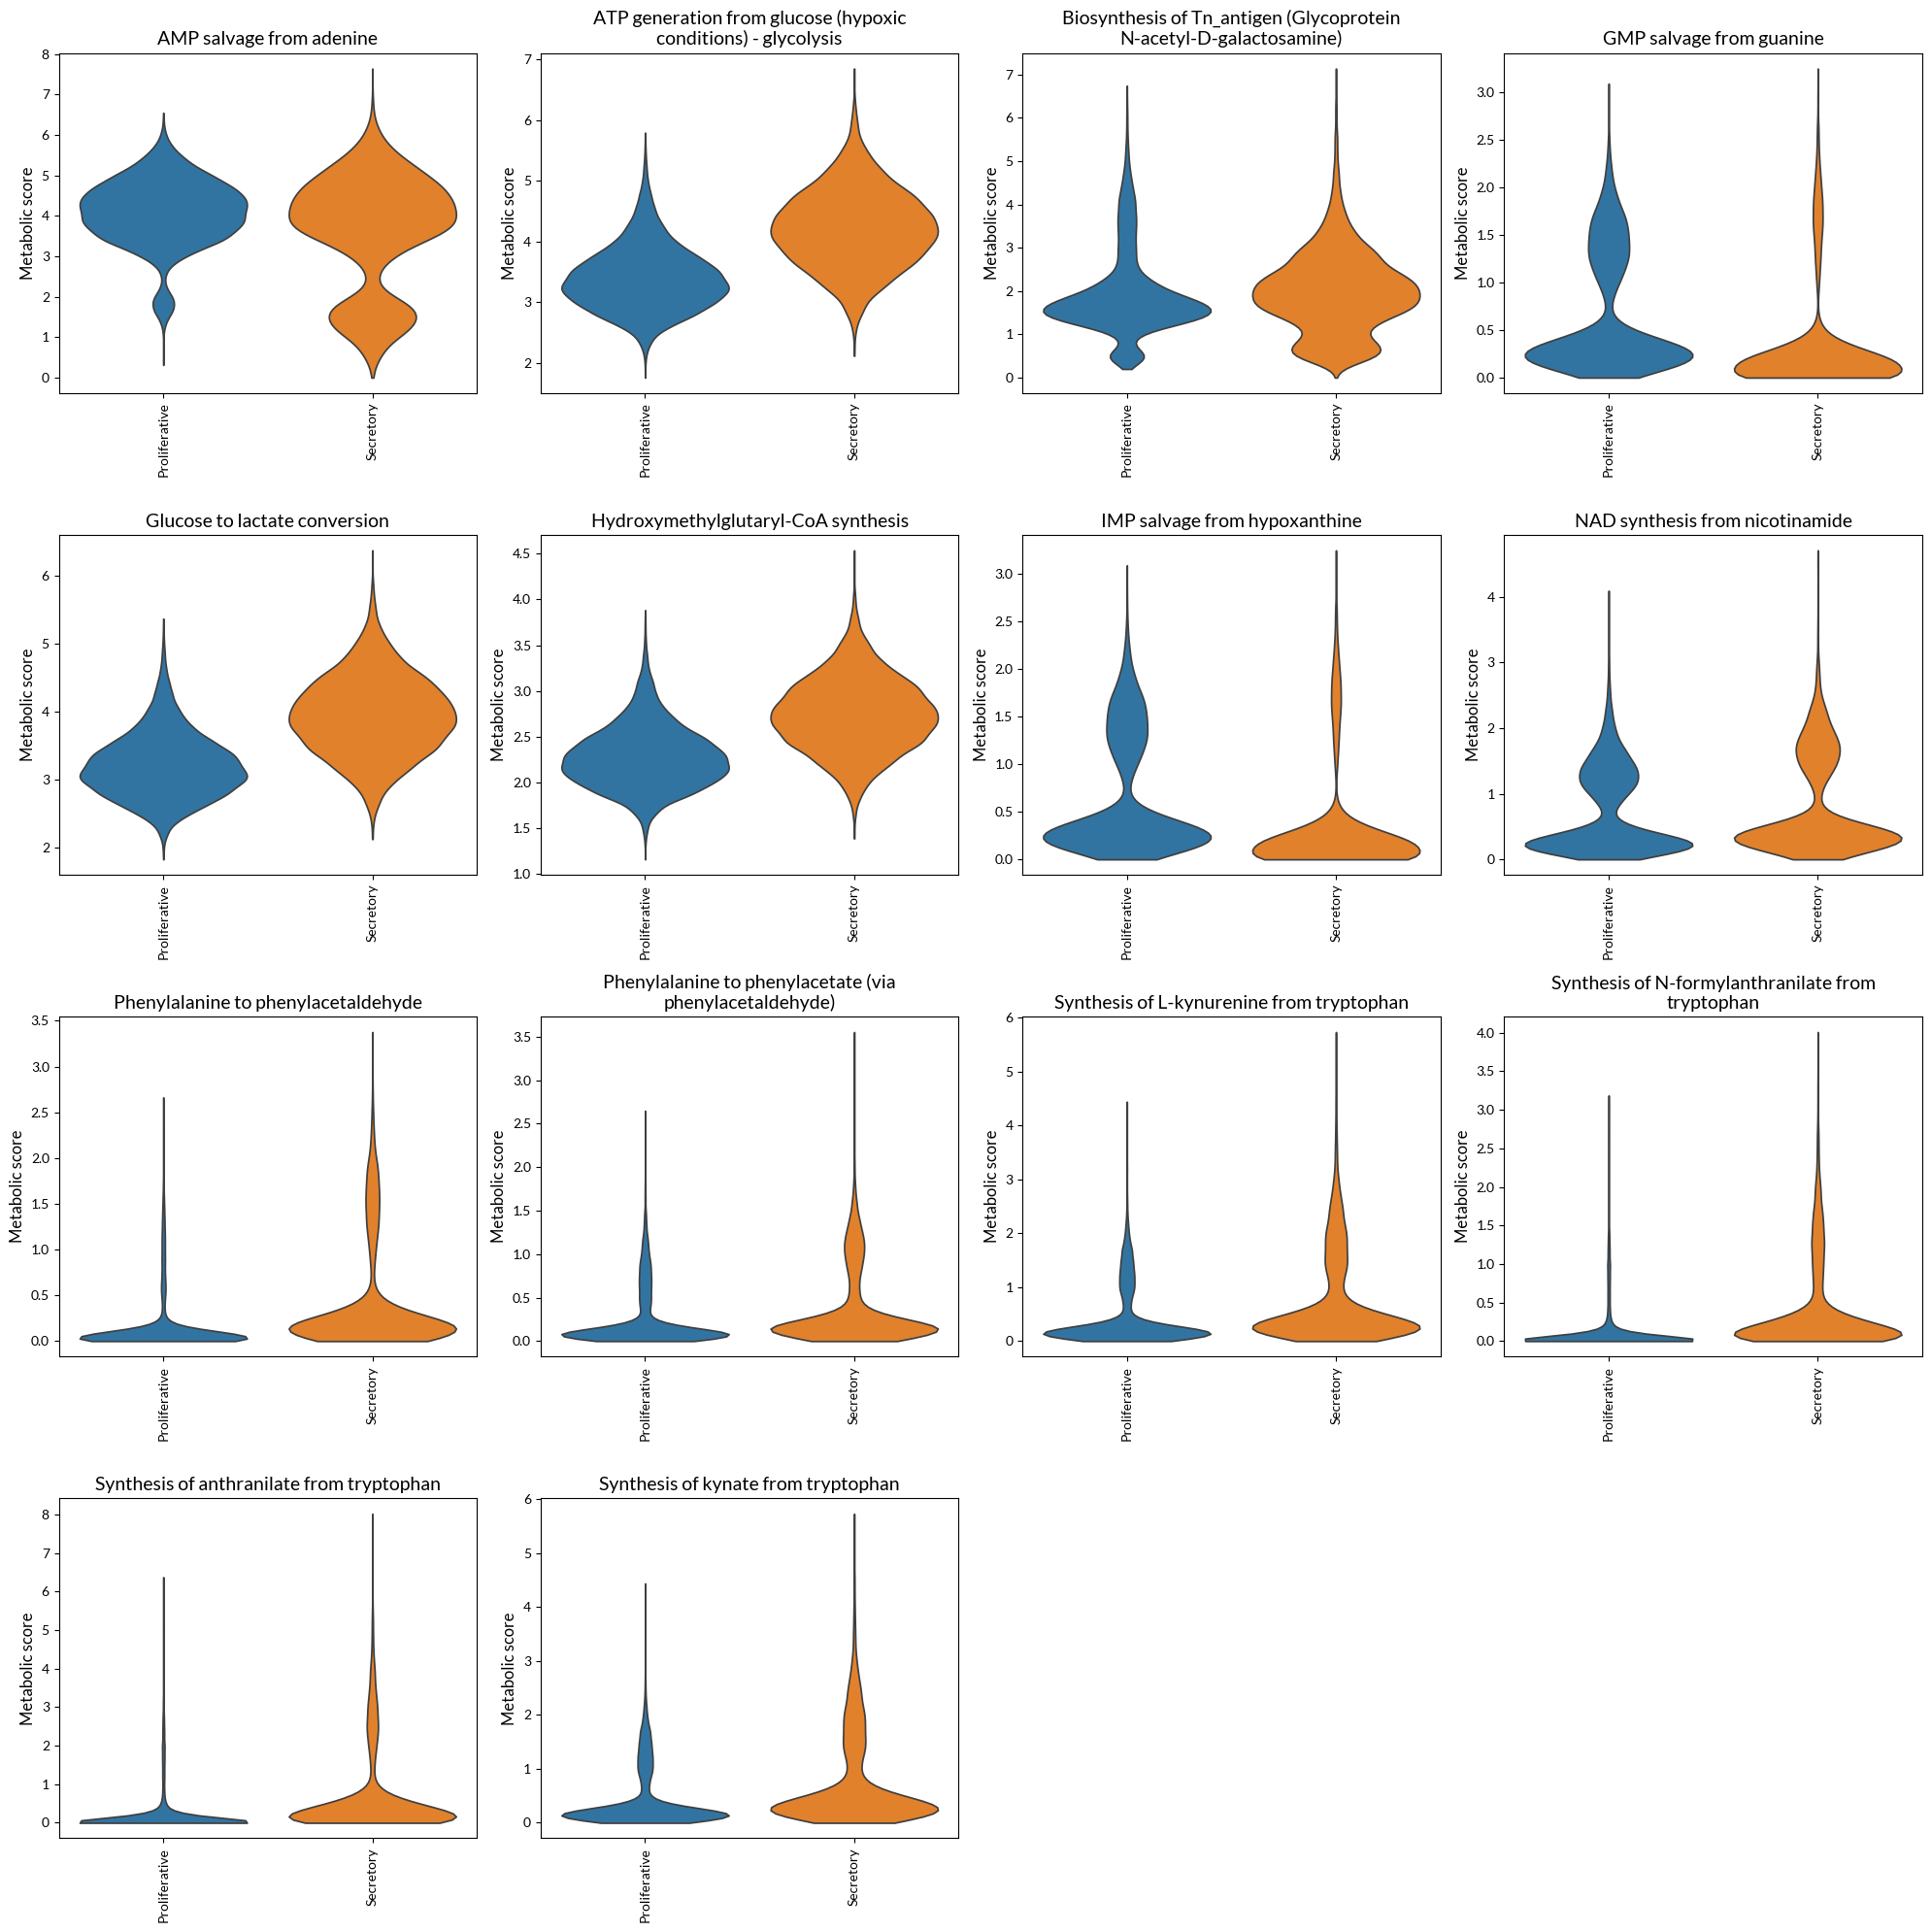

In [20]:
fig, axes = sccellfie.plotting.create_multi_violin_plots(results['adata'].metabolic_tasks,
                                                         features=gam_tasks,
                                                         groupby=cell_group,
                                                         n_cols=4,
                                                         stripplot=False,
                                                         ylabel='Metabolic score',
                                                         save='GAM-Tasks'
                                                        )

## Detection of metabolic task markers & visualization

In [21]:
palette = glasbey.extend_palette('Set2', 
                                 palette_size=max([10, results['adata'].metabolic_tasks.obs[cell_group].unique().shape[0]]))

In [22]:
results['adata'].metabolic_tasks.obs['celltype'] = results['adata'].metabolic_tasks.obs['celltype'].astype('category')

Detection using TF-IDF

In [23]:
mrks = sccellfie.external.quick_markers(results['adata'].metabolic_tasks,
                                        cluster_key=cell_group, 
                                        n_markers=20, 
                                        express_cut=5*np.log(2))

In [24]:
mrks.head()

,gene,cluster,tf,idf,tf_idf,gene_frequency_outside_cluster,gene_frequency_global,second_best_tf,second_best_cluster,pval,qval
0,Synthesis of alanine from glutamine,Proliferative,0.310410,1.405190,0.436185,0.146871,0.245320,0.146871,Secretory,1.590733e-225,1.590733e-225
1,Conversion of glycine to pyruvate,Proliferative,0.195791,2.017064,0.394924,0.038140,0.133046,0.038140,Secretory,0.000000e+00,0.000000e+00
2,Pyridoxal-phosphate synthesis,Proliferative,0.514548,0.676131,0.347902,0.499555,0.508581,0.499555,Secretory,7.033885e-03,7.033885e-03
3,Conversion of estrone (E1) to estrone sulfate ...,Proliferative,0.165932,1.861926,0.308953,0.139403,0.155373,0.139403,Secretory,7.685012e-10,7.685012e-10
4,Conversion of carnosine to beta-alanine,Proliferative,0.269030,1.034308,0.278259,0.486220,0.355472,0.269030,Proliferative,1.000000e+00,2.760905e-303


<Axes: >

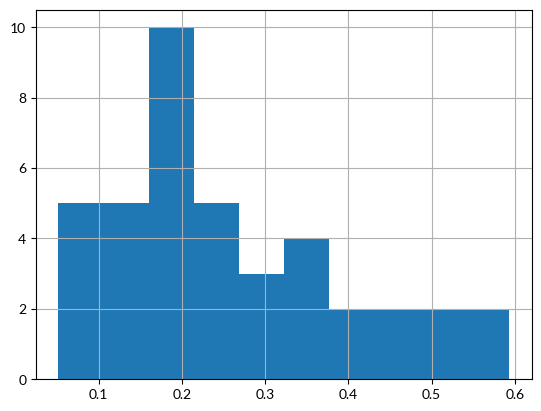

In [25]:
mrks['tf_idf'].hist()

Text(0, 0.5, 'IDF')

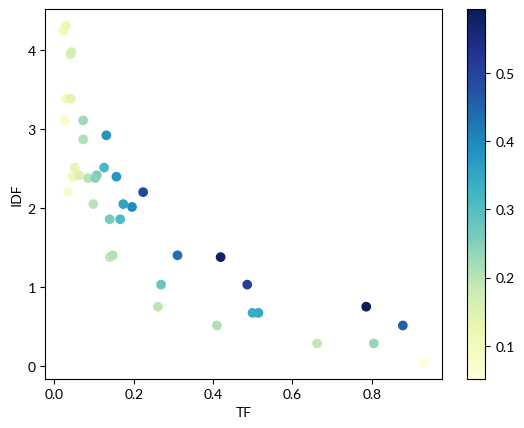

In [26]:
scatter = plt.scatter(mrks['tf'], mrks['idf'], c=mrks['tf_idf'], cmap='YlGnBu')
plt.colorbar(scatter)
plt.xlabel('TF')
plt.ylabel('IDF')

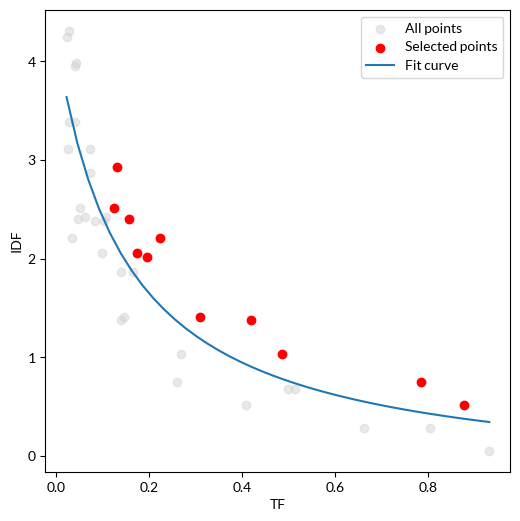

In [27]:
x_col = 'tf'
y_col = 'idf'
df = mrks
tfidf_threshold = 0.3
tf_ratio = 1.2

# Visualization
plt.figure(figsize=(6, 6))

# Plot all points
plt.scatter(df[x_col], df[y_col], alpha=0.5, c='lightgray', label='All points')

# Plot selected points
filtered_mrks, curve = sccellfie.external.tf_idf.filter_tfidf_markers(df, tf_col=x_col, idf_col=y_col, tfidf_threshold=tfidf_threshold, tf_ratio=tf_ratio)

plt.scatter(filtered_mrks[x_col], filtered_mrks[y_col], c='red', label='Selected points')
plt.plot(*curve, label='Fit curve')

plt.xlabel('TF')
plt.ylabel('IDF')
plt.legend()

In [28]:
tf_idf_mrks = filtered_mrks['gene'].unique().tolist()
len(tf_idf_mrks)

11

In [29]:
tf_idf_mrks

['Synthesis of alanine from glutamine',
 'Conversion of glycine to pyruvate',
 'Glucose to lactate conversion',
 'Mevalonate synthesis',
 'Conversion of carnosine to beta-alanine',
 'Presence of the thioredoxin system through the thioredoxin reductase activity',
 'ATP generation from glucose (hypoxic conditions) - glycolysis',
 'Synthesis of fructose-6-phosphate from erythrose-4-phosphate (HMP shunt)',
 'Conversion of 1-phosphatidyl-1D-myo-inositol 4,5-bisphosphate to 1D-myo-inositol 1,4,5-trisphosphate',
 'Synthesis of inositol',
 'Conversion of glutamate to glutamine']

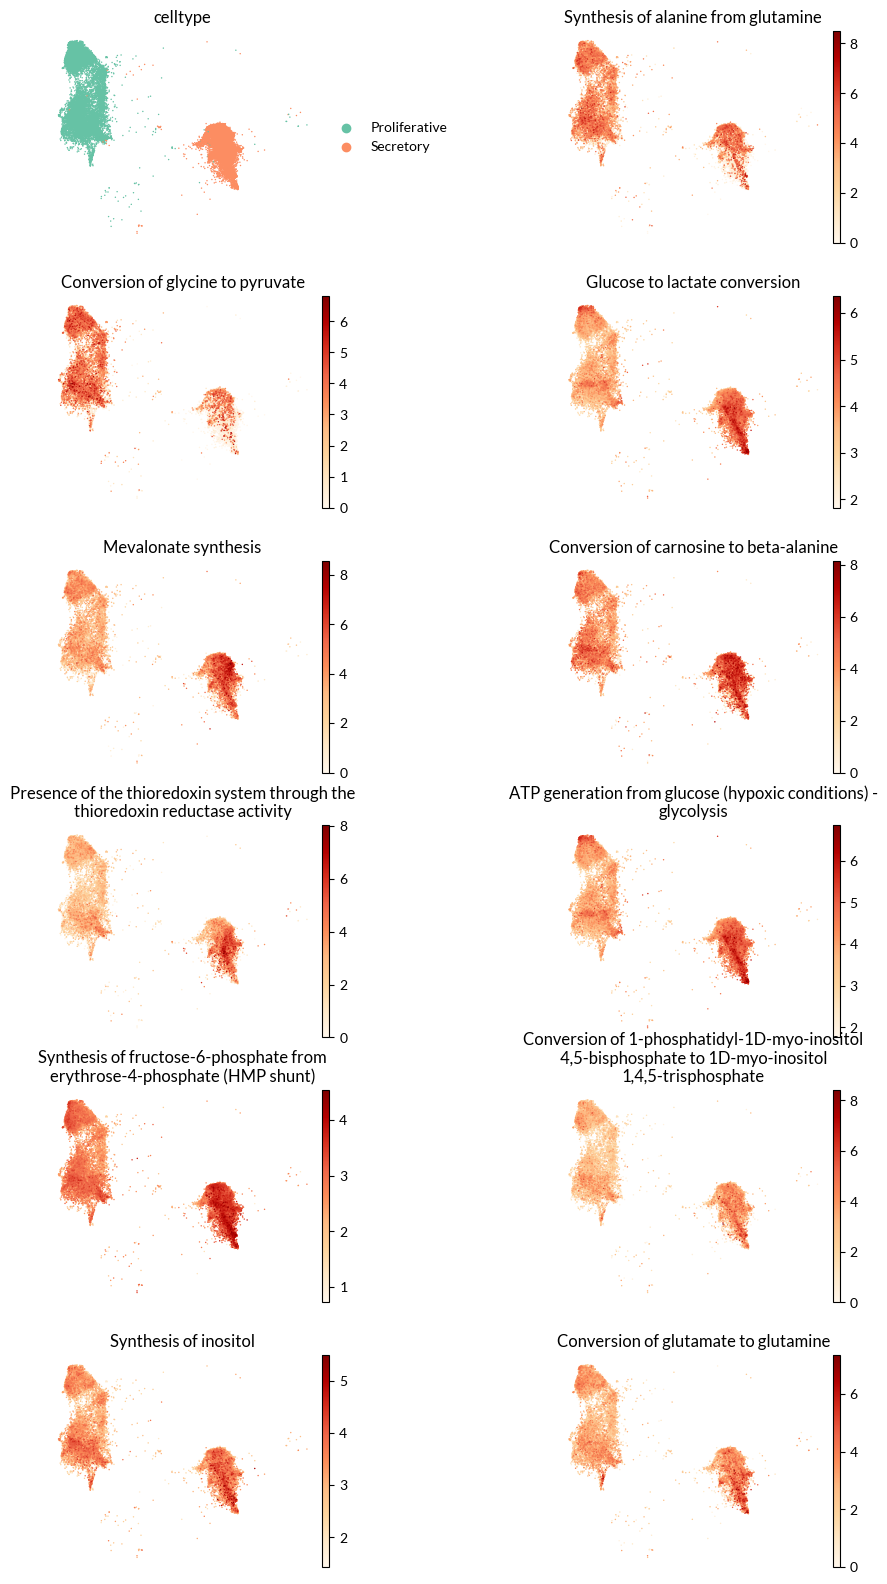

In [30]:
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['font.size'] = 10

sc.pl.embedding(results['adata'].metabolic_tasks,
                color=[cell_group] + tf_idf_mrks,
                ncols=2,
                palette=palette,
                frameon=False,
                basis='X_umap',
                wspace=0.7,
                cmap='OrRd',
                title = [cell_group] + ["\n".join(textwrap.wrap(t, width=50)) for t in tf_idf_mrks],
                save='Markers-TF-IDF'
               )

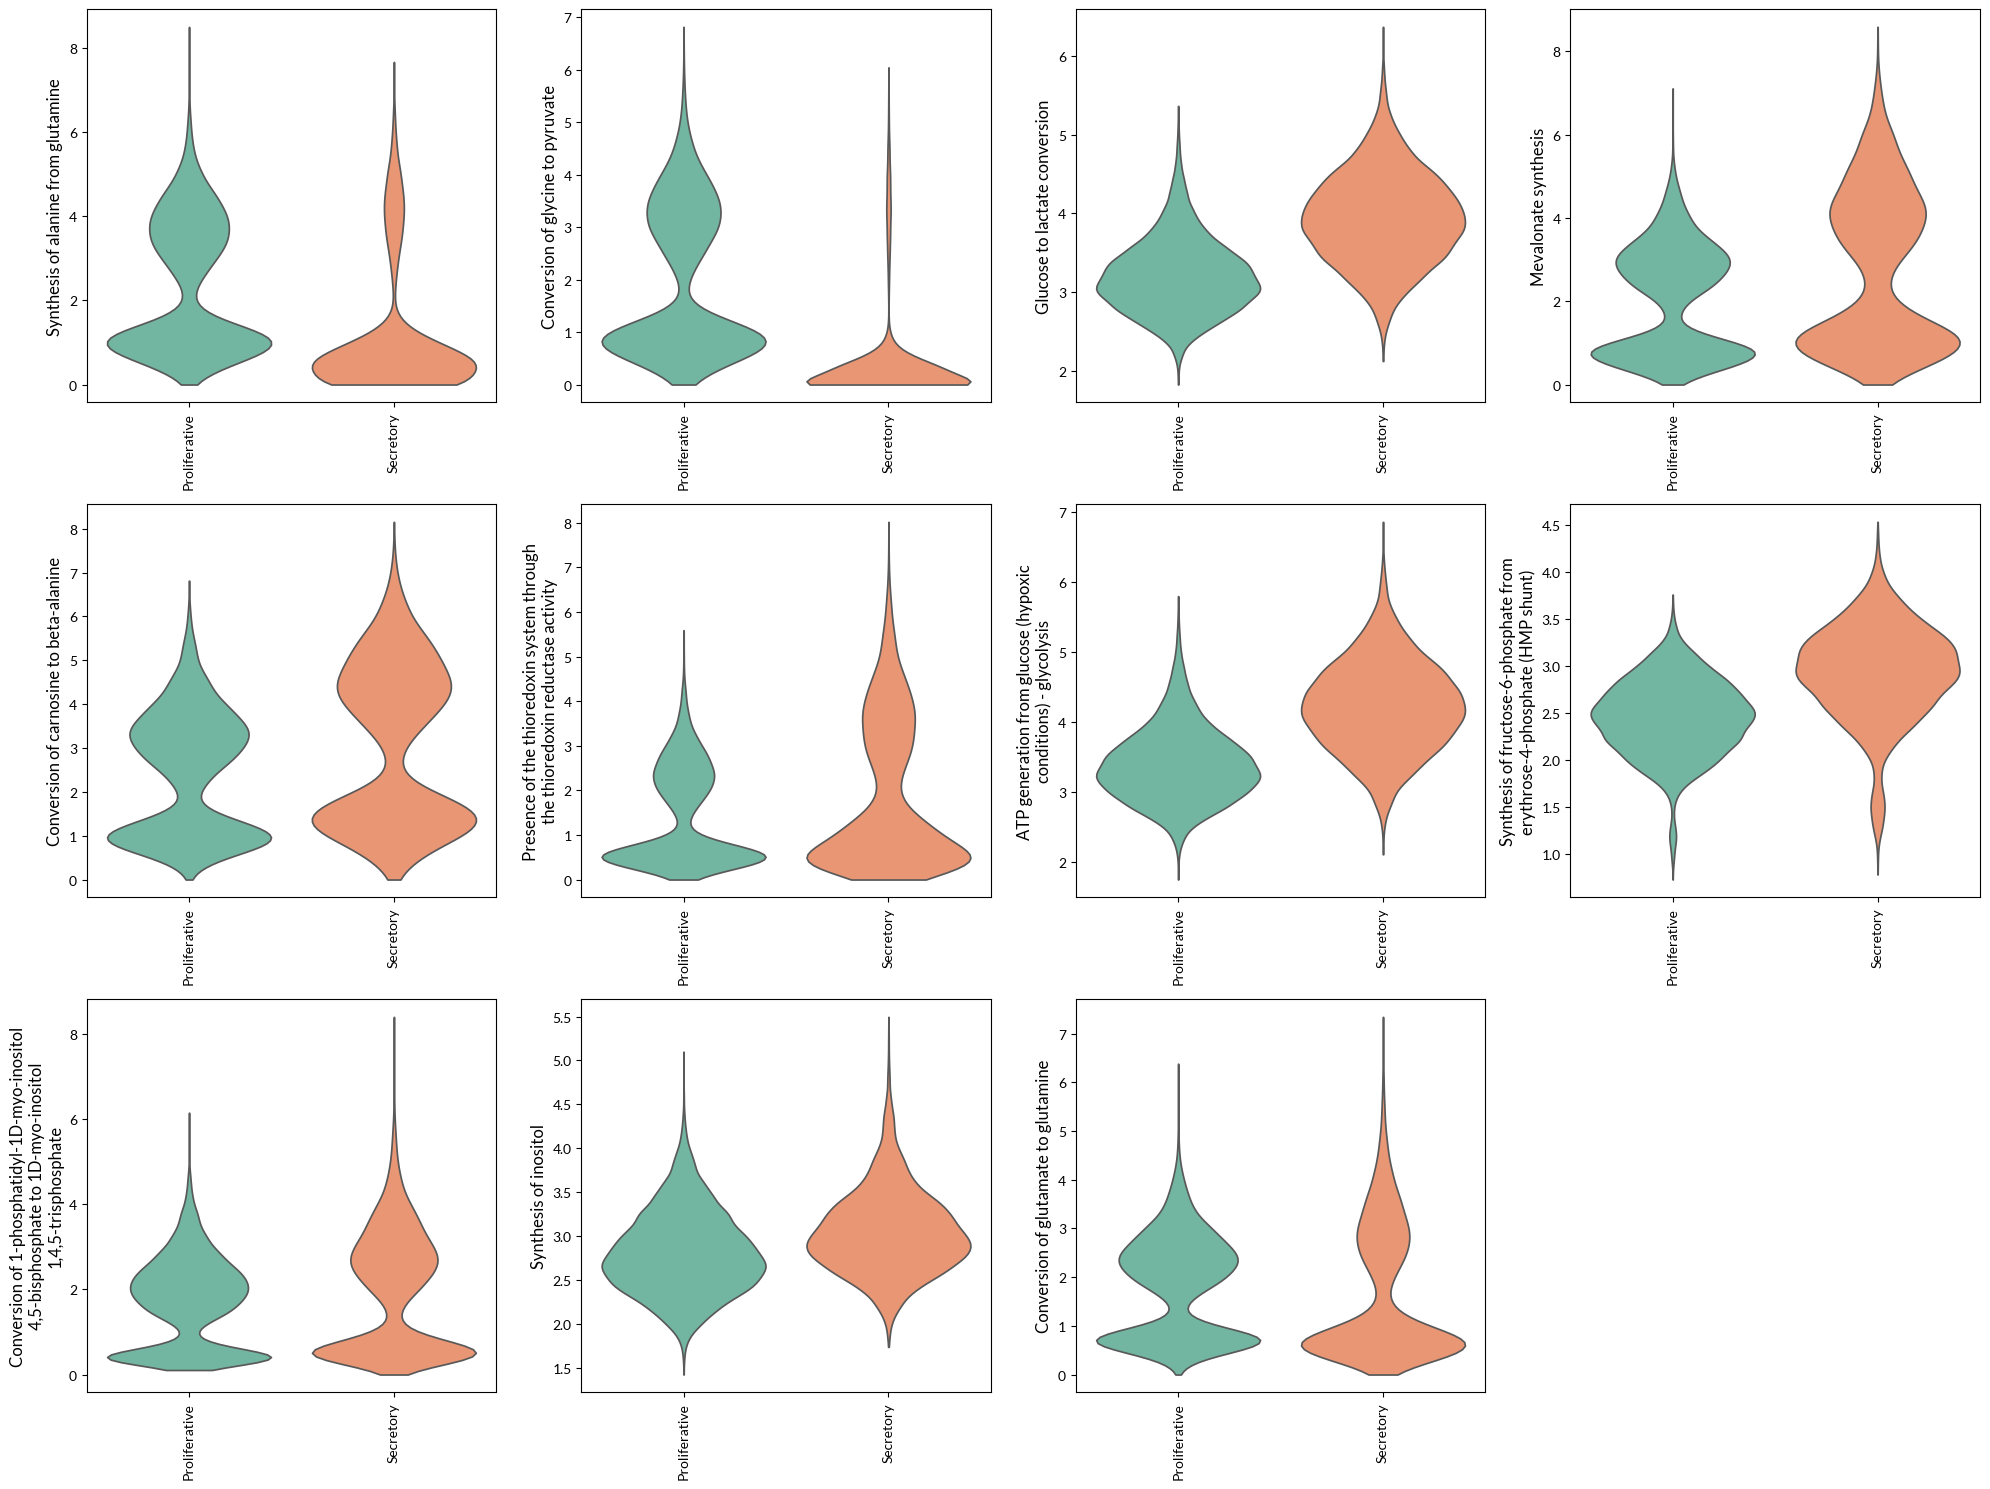

In [31]:
fig, axes = sccellfie.plotting.create_multi_violin_plots(results['adata'].metabolic_tasks,
                                                         features=tf_idf_mrks,
                                                         groupby=cell_group,
                                                         n_cols=4,
                                                         stripplot=False,
                                                        )

Detection using Wilcoxon's test in Scanpy

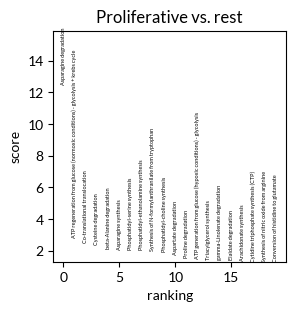

In [32]:
method = 'logreg'
sc.tl.rank_genes_groups(results['adata'].metabolic_tasks, cell_group, method=method,
                        use_raw=False, key_added = method)

sc.pl.rank_genes_groups(results['adata'].metabolic_tasks, n_genes=20, sharey=True, key=method, fontsize=4)

In [33]:
scanpy_df = sc.get.rank_genes_groups_df(results['adata'].metabolic_tasks, 
                                        key=method, 
                                        group=None) 

In [34]:
scanpy_df.sort_values('scores', ascending=False).head(10)

,names,scores
0,Asparagine degradation,12.529008
1,ATP regeneration from glucose (normoxic condit...,2.868478
2,Co-translational translocation,2.502708
3,Cysteine degradation,2.402150
4,beta-Alanine degradation,2.154047
5,Asparagine synthesis,2.104707
6,Phosphatidyl-serine synthesis,2.102695
7,Phosphatidyl-ethanolamine synthesis,2.064169
8,Synthesis of N-formylanthranilate from tryptophan,2.031409
9,Phosphatidyl-choline synthesis,1.964769


<Axes: >

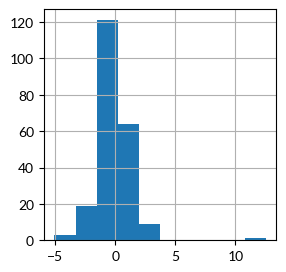

In [35]:
scanpy_df['scores'].hist()

In [36]:
sc_markers_df = scanpy_df
scanpy_markers = sc_markers_df.loc[sc_markers_df['scores'] > 1.5]['names'].unique().tolist()
len(scanpy_markers)

13

In [37]:
scanpy_markers

['Asparagine degradation',
 'ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle',
 'Co-translational translocation',
 'Cysteine degradation',
 'beta-Alanine degradation',
 'Asparagine synthesis',
 'Phosphatidyl-serine synthesis',
 'Phosphatidyl-ethanolamine synthesis',
 'Synthesis of N-formylanthranilate from tryptophan',
 'Phosphatidyl-choline synthesis',
 'Aspartate degradation',
 'Proline degradation',
 'ATP generation from glucose (hypoxic conditions) - glycolysis']

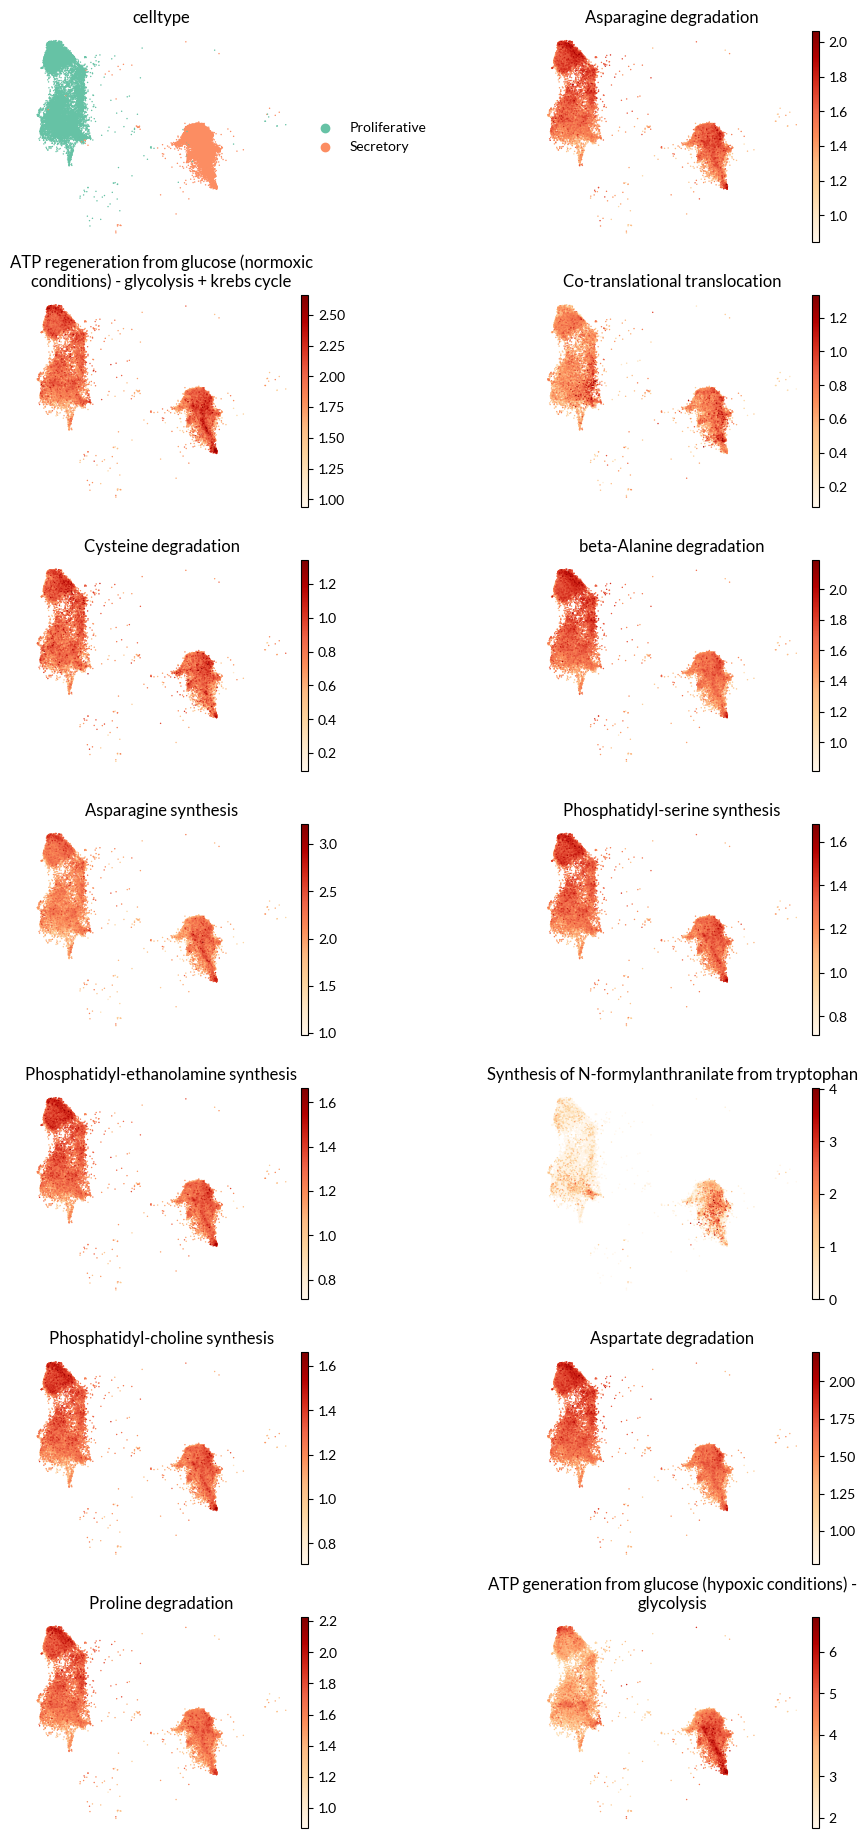

In [38]:
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['font.size'] = 10

sc.pl.embedding(results['adata'].metabolic_tasks,
                color=[cell_group] + scanpy_markers,
                ncols=2,
                palette=palette,
                frameon=False,
                basis='X_umap',
                wspace=0.7,
                cmap='OrRd',
                title=[cell_group] + ["\n".join(textwrap.wrap(t, width=50)) for t in scanpy_markers],
                save='Markers-Scanpy'
               )

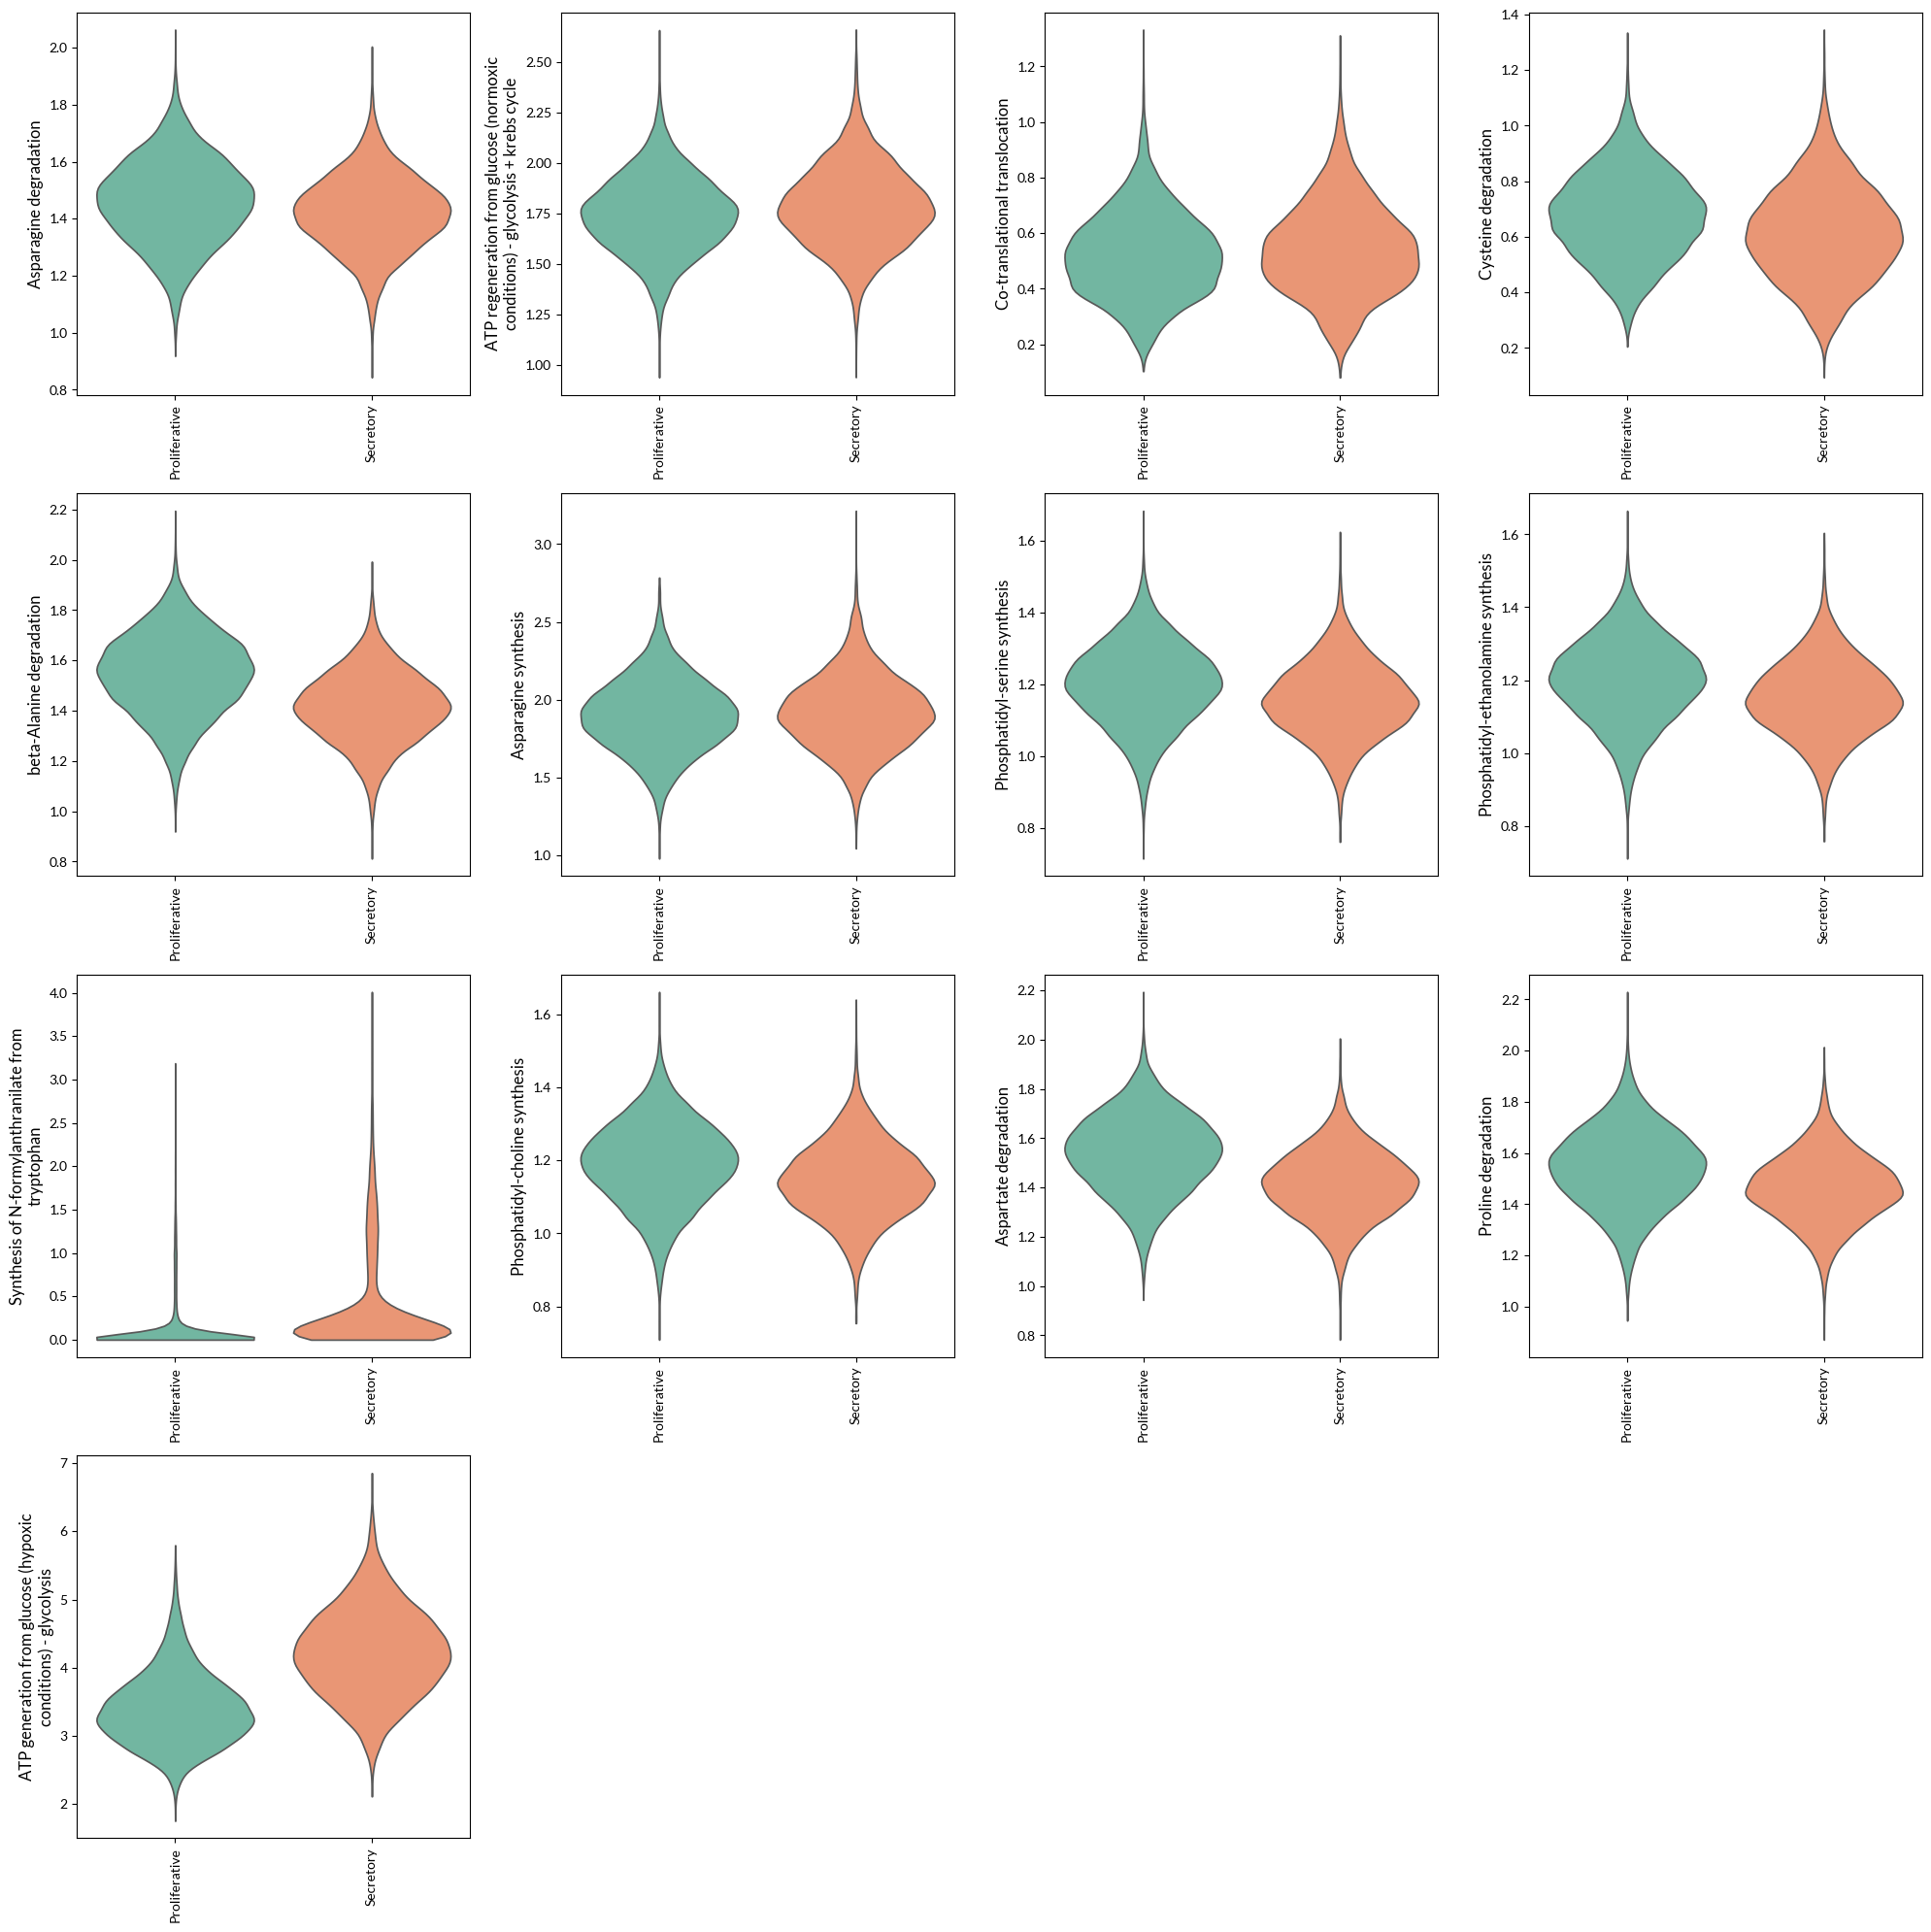

In [39]:
fig, axes = sccellfie.plotting.create_multi_violin_plots(results['adata'].metabolic_tasks,
                                                         features=scanpy_markers,
                                                         groupby=cell_group,
                                                         n_cols=4,
                                                         stripplot=False
                                                        )

## Both methods markers

In [40]:
both_markers = sorted(set(tf_idf_mrks + scanpy_markers))

In [41]:
agg = sccellfie.expression.aggregation.agg_expression_cells(results['adata'].metabolic_tasks[:, both_markers], cell_group, agg_func='trimean')

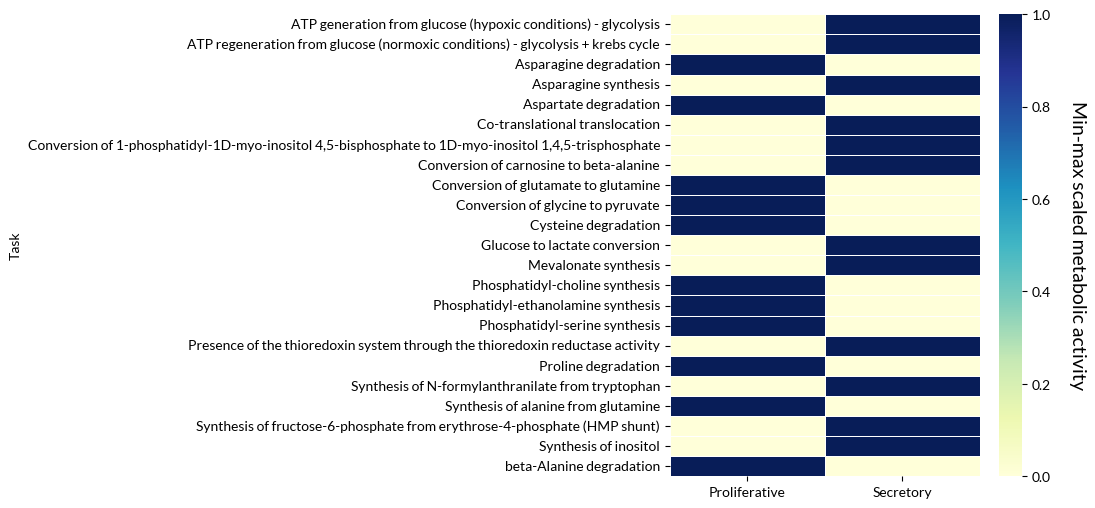

In [42]:
plt.figure(figsize=(5, 6))
input_df = sccellfie.preprocessing.matrix_utils.min_max_normalization(agg.T, axis=1)

g = sns.heatmap(input_df, cmap='YlGnBu', linewidths=0.5, xticklabels=1, yticklabels=1)

cbar = g.collections[0].colorbar
cbar.set_label('Min-max scaled metabolic activity', size=14, rotation=270, labelpad=25)  # Change colorbar label size and rotation
#cbar.ax.tick_params(labelsize=12)  # Change tick label size

plt.savefig('./figures/Heatmap-Both-Markers.pdf', dpi=300, bbox_inches='tight')

## Differential metabolic analysis between conditions, per cell type

In [43]:
adata.obs.celltype.unique()

['Proliferative', 'Secretory']
Categories (2, object): ['Proliferative', 'Secretory']

In [44]:
results['adata'].metabolic_tasks.obs['type'] = 'Epithelial'

In [45]:
contrasts = [('Proliferative', 'Secretory')]
condition_key = 'celltype'
celltype = 'Epithelial'

In [46]:
results['adata'].metabolic_tasks.obs['celltype'].unique()

['Proliferative', 'Secretory']
Categories (2, object): ['Proliferative', 'Secretory']

In [47]:
dma = sccellfie.stats.scanpy_differential_analysis(results['adata'].metabolic_tasks,
                                                   cell_type=celltype, 
                                                   cell_type_key='type', 
                                                   condition_key=condition_key, 
                                                   condition_pairs=contrasts,
                                                   min_cells=150,
                                                  )

Processing DE analysis: 100%|██████████| 1/1 [00:05<00:00,  5.25s/it]


In [48]:
dma.head()

,cell_type,feature,group1,group2,log2FC,test_statistic,p_value,cohens_d,n_group1,n_group2,median_group1,median_group2,median_diff,adj_p_value
0,Epithelial,Synthesis of thromboxane from arachidonate,Proliferative,Secretory,2.848969,112.617363,0.0,1.429601,17013,11248,0.05301139327036955,0.7074863687877121,0.654475,0.0
1,Epithelial,ATP generation from glucose (hypoxic condition...,Proliferative,Secretory,0.312795,96.743622,0.0,1.417954,17013,11248,3.3435641690387627,4.208843175131076,0.865279,0.0
2,Epithelial,Glucose to lactate conversion,Proliferative,Secretory,0.298287,96.165962,0.0,1.407051,17013,11248,3.16014671091303,3.931876736485732,0.771730,0.0
3,Epithelial,Disulfide bond formation,Proliferative,Secretory,0.689451,95.043854,0.0,1.436054,17013,11248,0.777312358353157,1.3281367673058477,0.550824,0.0
4,Epithelial,Fructose degradation (to glucose-3-phosphate),Proliferative,Secretory,0.331466,92.598206,0.0,1.250719,17013,11248,4.672266953979388,5.955832836838976,1.283566,0.0


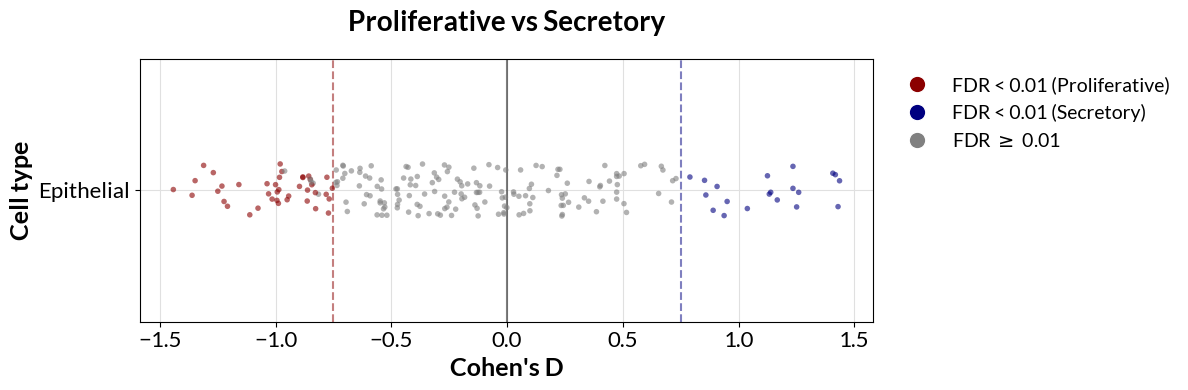

In [49]:
cohen_threshold = 0.75
pval_threshold = 0.01
logfc_threshold = np.log2(1.1)

fig, ax, sig = sccellfie.plotting.create_beeswarm_plot(dma,
                                                       x='cohens_d', 
                                                       cohen_threshold=cohen_threshold, 
                                                       pval_threshold=pval_threshold,
                                                       logfc_threshold=logfc_threshold,
                                                       show_n_significant=False,
                                                       strip_jitter=True,
                                                       lgd_bbox_to_anchor=(1.01, 1),
                                                       ticks_fontsize=16,
                                                       labels_fontsize=18,
                                                       figsize=(12, 4), )

plt.savefig('./figures/Epithelial-DE.pdf', dpi=300, bbox_inches='tight')

In [50]:
sig_tasks = sig.reset_index().feature.unique().tolist()

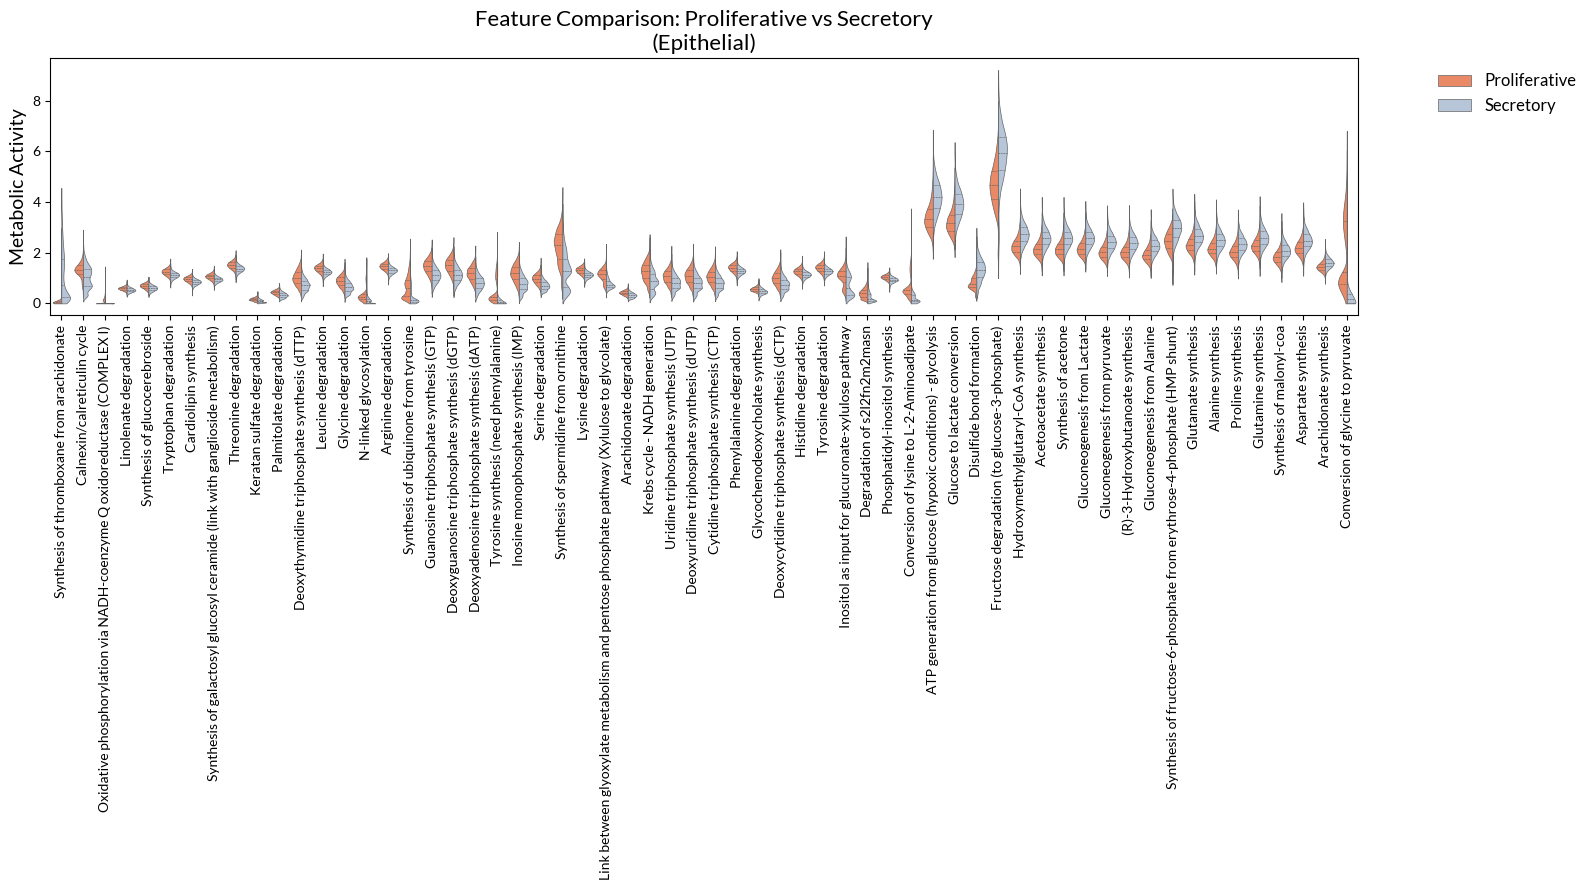

In [51]:
fig, ax = sccellfie.plotting.create_comparative_violin(results['adata'].metabolic_tasks, 
                                                       significant_features=sig_tasks, 
                                                       group1='Proliferative', 
                                                       group2='Secretory',
                                                       condition_key=condition_key,
                                                       celltype=celltype,
                                                       cell_type_key='type',
                                                       xlabel='',
                                                       fontsize=14,
                                                       figsize=(16,9),
                                                       save='DE-Distributions'
                                                      )

In [52]:
dma.loc[dma.feature.isin(gam_tasks)]

,cell_type,feature,group1,group2,log2FC,test_statistic,p_value,cohens_d,n_group1,n_group2,median_group1,median_group2,median_diff,adj_p_value
1,Epithelial,ATP generation from glucose (hypoxic condition...,Proliferative,Secretory,0.312795,96.743622,0.000000e+00,1.417954,17013,11248,3.3435641690387627,4.208843175131076,0.865279,0.000000e+00
2,Epithelial,Glucose to lactate conversion,Proliferative,Secretory,0.298287,96.165962,0.000000e+00,1.407051,17013,11248,3.16014671091303,3.931876736485732,0.771730,0.000000e+00
5,Epithelial,Hydroxymethylglutaryl-CoA synthesis,Proliferative,Secretory,0.266843,89.246658,0.000000e+00,1.259545,17013,11248,2.250233662965823,2.7342134749846636,0.483980,0.000000e+00
13,Epithelial,Synthesis of N-formylanthranilate from tryptophan,Proliferative,Secretory,1.723372,72.829750,0.000000e+00,0.654582,17013,11248,0.0252040617765468,0.16586841216698922,0.140664,0.000000e+00
18,Epithelial,Phenylalanine to phenylacetaldehyde,Proliferative,Secretory,1.406224,66.389664,0.000000e+00,0.593858,17013,11248,0.05743567892484681,0.18227068600824792,0.124835,0.000000e+00
19,Epithelial,Synthesis of anthranilate from tryptophan,Proliferative,Secretory,1.604444,66.109169,0.000000e+00,0.577464,17013,11248,0.04098838088417979,0.27543983343236056,0.234451,0.000000e+00
29,Epithelial,Synthesis of L-kynurenine from tryptophan,Proliferative,Secretory,0.801303,46.361900,0.000000e+00,0.473221,17013,11248,0.19761793714249715,0.38267898185008986,0.185061,0.000000e+00
30,Epithelial,Synthesis of kynate from tryptophan,Proliferative,Secretory,0.801303,46.361900,0.000000e+00,0.473221,17013,11248,0.19761793714249715,0.38267898185008986,0.185061,0.000000e+00
35,Epithelial,Phenylalanine to phenylacetate (via phenylacet...,Proliferative,Secretory,0.549946,36.976429,2.740281e-299,0.309625,17013,11248,0.10409187237910912,0.18449385507199145,0.080402,4.719373e-299
56,Epithelial,Biosynthesis of Tn_antigen (Glycoprotein N-ace...,Proliferative,Secretory,0.037277,14.691957,7.258634e-49,0.051870,17013,11248,1.6800448546436118,1.9435325657192009,0.263488,8.654525e-49


In [53]:
gam_tasks

['AMP salvage from adenine',
 'ATP generation from glucose (hypoxic conditions) - glycolysis',
 'Biosynthesis of Tn_antigen (Glycoprotein N-acetyl-D-galactosamine)',
 'GMP salvage from guanine',
 'Glucose to lactate conversion',
 'Hydroxymethylglutaryl-CoA synthesis',
 'IMP salvage from hypoxanthine',
 'NAD synthesis from nicotinamide',
 'Phenylalanine to phenylacetaldehyde',
 'Phenylalanine to phenylacetate (via phenylacetaldehyde)',
 'Synthesis of L-kynurenine from tryptophan',
 'Synthesis of N-formylanthranilate from tryptophan',
 'Synthesis of anthranilate from tryptophan',
 'Synthesis of kynate from tryptophan']

In [54]:
sorted_tasks = ['ATP generation from glucose (hypoxic conditions) - glycolysis',
                'Glucose to lactate conversion',
                'Hydroxymethylglutaryl-CoA synthesis',
                'NAD synthesis from nicotinamide',
                'Phenylalanine to phenylacetaldehyde',
                'Phenylalanine to phenylacetate (via phenylacetaldehyde)',
                'Synthesis of L-kynurenine from tryptophan',
                'Synthesis of N-formylanthranilate from tryptophan',
                'Synthesis of anthranilate from tryptophan',
                'Synthesis of kynate from tryptophan',
                'AMP salvage from adenine',
                'GMP salvage from guanine',
                'IMP salvage from hypoxanthine',
                'Biosynthesis of Tn_antigen (Glycoprotein N-acetyl-D-galactosamine)',
               ]

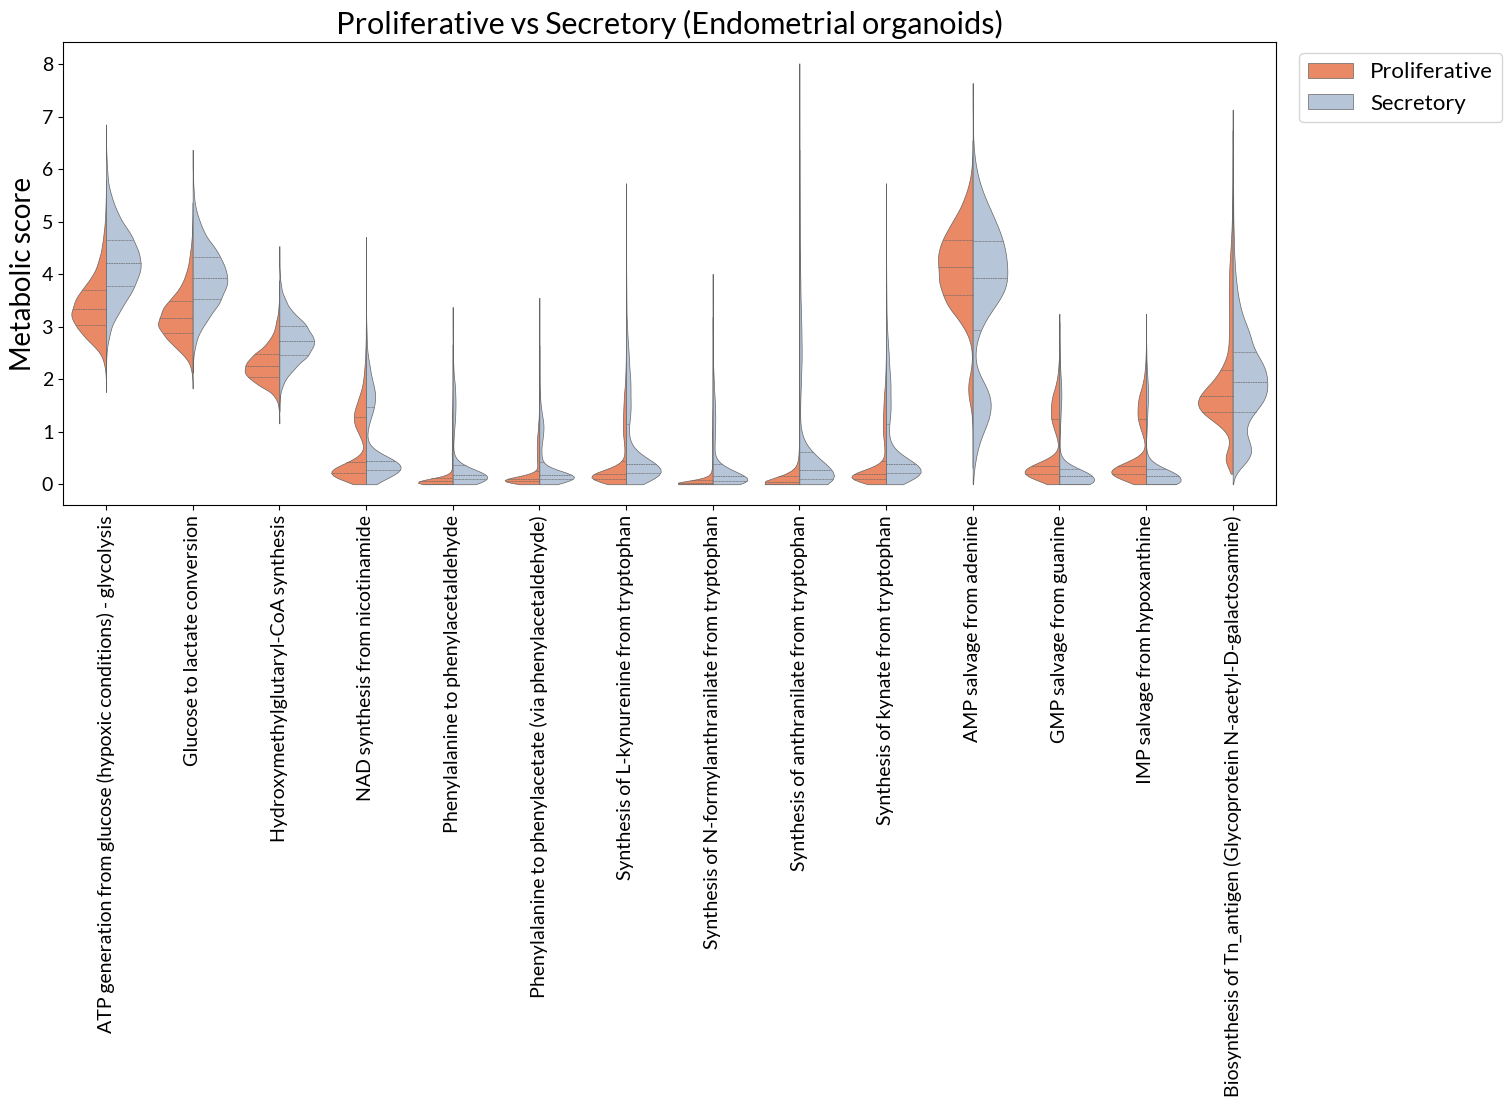

In [55]:
fig, ax = sccellfie.plotting.create_comparative_violin(results['adata'].metabolic_tasks, 
                                                       significant_features=sorted_tasks, 
                                                       group1='Proliferative', 
                                                       group2='Secretory',
                                                       condition_key=condition_key,
                                                       celltype=celltype,
                                                       cell_type_key='type',
                                                       xlabel='',
                                                       ylabel='Metabolic score',
                                                       fontsize=20,
                                                       figsize=(16,12),
                                                       #palette=['#D8A3B7', '#EDAF5C'],
                                                       title='Proliferative vs Secretory (Endometrial organoids)',
                                                       #save='DE-GAM-Distributions'
                                                      )

ax.legend(fontsize=16,bbox_to_anchor=(1.01, 1))
ax.tick_params(axis='both', labelsize=14)  # Control tick label size
plt.savefig('./figures/violin_DE-GAM-Distributions.pdf', dpi=300, bbox_inches='tight')

In [56]:
sccellfie.preprocessing.database_manipulation.get_element_associations(results['task_by_gene'], 
                                                                       "Conversion of 1-phosphatidyl-1D-myo-inositol 4,5-bisphosphate to 1D-myo-inositol 1,4,5-trisphosphate")

['PLCB1',
 'PLCB2',
 'PLCB3',
 'PLCB4',
 'PLCD1',
 'PLCD3',
 'PLCD4',
 'PLCE1',
 'PLCG1',
 'PLCG2',
 'PLCH1',
 'PLCH2',
 'PLCL1',
 'PLCXD2',
 'PLCZ1']